In [1]:
pwd

'C:\\Users\\User\\Documents\\Latihan Hack8\\Latihan_github'

I. PERKENALAN
    NAMA : AUDINIA A
    BATCH : 002
    DATA: POKEMON.CSV (FROM: KAGGLE)
    TUJUAN: 
    1. MENGETAHUI BERAPA BANYAK JUMLAH POKEMON YANG TIDAK MEMILIKI 2 TIPE
    2. MENGETAHUI BERAPA BANYAK JUMLAH POKEMON GENERASI KE-1 YANG MEMILIKI 1 TIPE
    3. MENGETAHUI BERAPA BANYAK JUMLAH POKEMON GENERASI KE-6 YANG MEMILIKI 1 TIPE
    4. MENGETAHUI MASING-MASING POKEMON TIPE 1 DAN TIPE 2 BERDASARKAN LEGENDARY

In [78]:
#Import apasaja library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

III DATA LOADING

In [82]:
#Membaca Data Pokemon
pk = pd.read_csv('Pokemon.csv')
pk

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [83]:
#Menampilkan 10 data teratas
pk.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [84]:
#Mengetahui 10 data terbawah
pk.tail(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [85]:
#Display Tipe Data
#Untuk mengetahui/menampilkan semua kolom dan tipe data
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [86]:
#Mengetahui keseluruhan nilai statistic yang ada pada data
pk.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [87]:
#Menampilkan kesimpulan nili stastic dalam data OBJECT = STRING
pk.describe(include="object")

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Whismur,Water,Flying
freq,1,112,97


In [88]:
#Memunculkan semua index axis
pk.axes

[RangeIndex(start=0, stop=800, step=1),
 Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
        'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
       dtype='object')]

IV. DATA CLEANING

In [89]:
#menampilkan beberapa data teratas
pk.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [90]:
#Merubah kolom # menjadi ID Pokemon itu sendiri
pk.rename(columns={'#':'ID'}, inplace=True)
pk

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [91]:
#Mengetahui kolom mana yang ada missing 
pk.isnull().sum()

ID              0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [92]:
#Setelah tahu yang missing, maka selanjutnya menganti nilai missing di Type 2 = Type 1
pk['Type 2'].fillna('No', inplace=True)
pk

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,No,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [93]:
#Cek kembali hasilnya
pk.isnull().sum()

ID            0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

V. EKSPLORASI DATA

In [119]:
#Mengetahui nilai masing-masing pokemon yang memiliki 1 Tipe
pk["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [113]:
#Mengetahui nama pokemon Tipe Water tertinggi
pk.loc[pk["Type 1"] == "Water", "Name"].max()

'Wooper'

In [94]:
#Basic arimatika data eksplorasi
#Mengetahui pokemon yang memiliki total nilai terbesar
pk[pk['Total']==pk['Total'].max()]

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,No,780,106,150,70,194,120,140,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


In [95]:
#Mengetahui pokemon yang memiliki total nilai terendah
pk[pk['Total']==pk['Total'].min()]

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,191,Sunkern,Grass,No,180,30,30,30,30,30,30,2,False


In [17]:
#Mengetahui pokemon yang memiliki kecepatan tertinggi
pk[pk['Speed']==pk['Speed'].max()]

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,Psychic,600,50,95,90,95,90,180,3,True


In [51]:
#Mengetahui pokemon yang memiliki pertahanan terkuat
pk[pk['Defense']==pk['Defense'].max()]

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,306,AggronMega Aggron,Steel,Steel,630,70,140,230,60,80,50,3,False


In [52]:
#Mengetahui pokemon yang memiliki HP tertinggi
pk[pk['HP']==pk['HP'].max()]

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,Normal,540,255,10,10,75,135,55,2,False


In [55]:
#Mengetahui pokemon yang memiliki Sp.Atk tertinggi
pk[pk['Attack']== pk['Attack'].max()]

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [58]:
pk[pk['Sp. Atk']== pk['Sp. Atk'].max()]

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
164,150,MewtwoMega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True


In [59]:
pk[pk['Sp. Def']== pk['Sp. Def'].max()]

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


In [100]:
#Querying Data
#MENGETAHUI BERAPA BANYAK JUMLAH POKEMON YANG TIDAK MEMILIKI 2 TIPE(filter query)
pk1=pk[
    (pk['Type 2'] =='No')]
pk1

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,No,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,No,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,No,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,No,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,No,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,No,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,No,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,No,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,No,514,95,117,184,44,46,28,6,False


In [21]:
#Jumlah pokemon yang TIDAK memiliki 2 tipe ada 386 pokemon
#kalau tuple tanpa ada kurung lagi seperti di list
print(pk1.shape)

(386, 13)


In [104]:
#MENGETAHUI BERAPA BANYAK JUMLAH POKEMON GENERASI KE-1 YANG MEMILIKI 1 TIPE
pk2=pk[
    (pk['Generation'] == 1) & (pk['Type 2']!='No')]
pk2

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False


In [105]:
#Jumlah pokemon generasi ke-1 yang memiliki sama-sama ada 1 tipe berjumlah 78 pokemon
print(pk2.shape)

(78, 13)


In [102]:
#MENGETAHUI BERAPA BANYAK JUMLAH POKEMON GENERASI KE-6 YANG MEMILIKI 1 TIPE
pk3=pk[
    (pk['Generation'] == 6) & (pk['Type 2']!='No')]
pk3

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
720,652,Chesnaught,Grass,Fighting,530,88,107,122,74,75,64,6,False
723,655,Delphox,Fire,Psychic,534,75,69,72,114,100,104,6,False
726,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False
728,660,Diggersby,Normal,Ground,423,85,56,77,50,77,78,6,False
729,661,Fletchling,Normal,Flying,278,45,50,43,40,38,62,6,False
730,662,Fletchinder,Fire,Flying,382,62,73,55,56,52,84,6,False
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False
734,666,Vivillon,Bug,Flying,411,80,52,50,90,50,89,6,False
735,667,Litleo,Fire,Normal,369,62,50,58,73,54,72,6,False
736,668,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6,False


In [106]:
#Jumlah pokemon generasi ke-6 yang memiliki sama-sama ada 1 tipe berjumlah 50 pokemon
print(pk3.shape)

(33,)


#Grouping Data

In [121]:
#MENGETAHUI MASING-MASING POKEMON TIPE 1 DAN TIPE 2 BERDASARKAN LEGENDARY
pk4 = pk.groupby(['Legendary','Type 1',])['Name'].count()
pk4

Legendary  Type 1  
False      Bug          69
           Dark         29
           Dragon       20
           Electric     40
           Fairy        16
           Fighting     27
           Fire         47
           Flying        2
           Ghost        30
           Grass        67
           Ground       28
           Ice          22
           Normal       96
           Poison       28
           Psychic      43
           Rock         40
           Steel        23
           Water       108
True       Dark          2
           Dragon       12
           Electric      4
           Fairy         1
           Fire          5
           Flying        2
           Ghost         2
           Grass         3
           Ground        4
           Ice           2
           Normal        2
           Psychic      14
           Rock          4
           Steel         4
           Water         4
Name: Name, dtype: int64

In [115]:
#MENGETAHUI MASING-MASING POKEMON TIPE 1 DAN TIPE 2 BERDASARKAN LEGENDARY
pk41 = pk.groupby(['Legendary','Type 2',])['Name'].count()
pk41

Legendary  Type 2  
False      Bug           3
           Dark         19
           Dragon       14
           Electric      5
           Fairy        21
           Fighting     22
           Fire          9
           Flying       84
           Ghost        13
           Grass        25
           Ground       34
           Ice          11
           No          361
           Normal        4
           Poison       34
           Psychic      28
           Rock         14
           Steel        21
           Water        13
True       Dark          1
           Dragon        4
           Electric      1
           Fairy         2
           Fighting      4
           Fire          3
           Flying       13
           Ghost         1
           Ground        1
           Ice           3
           No           25
           Psychic       5
           Steel         1
           Water         1
Name: Name, dtype: int64

In [151]:
Me = pk["Total"].mean()
Me

435.1025

In [166]:
#MENGETAHUI POKEMON GENERASI KE-1 YANG MEMILIKI 1 TIPE DAN MEMILIKI TOTAL DIATAS RATA-RATA
r5 = pk[(pk['Generation'] ==1) & 
        (pk['Total'] > pk['Total'].mean()]

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-166-9841be8abe0d>, line 3)

V. VISUALISASI GRAFIK

In [99]:
#MENUNJUKKAN GENERATION PER TYPE POKEMON
bar = pk.pivot_table(values ='ID', columns='Type 1', index='Generation' , aggfunc='count')
bar

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Generation,,,,,,,,,,,,,,,,,,
1,14.0,NaN,3.0,9.0,2.0,7.0,14.0,NaN,4.0,13.0,8.0,2.0,24.0,14.0,11.0,10.0,NaN,31.0
2,12.0,6.0,NaN,7.0,5.0,2.0,8.0,NaN,1.0,9.0,3.0,4.0,15.0,1.0,7.0,5.0,3.0,18.0
3,12.0,6.0,12.0,5.0,NaN,5.0,8.0,NaN,5.0,13.0,7.0,7.0,18.0,3.0,12.0,8.0,12.0,27.0
4,10.0,3.0,4.0,12.0,1.0,3.0,5.0,NaN,7.0,15.0,4.0,3.0,18.0,6.0,8.0,6.0,3.0,13.0
5,18.0,13.0,9.0,8.0,NaN,7.0,9.0,2.0,5.0,15.0,10.0,6.0,19.0,2.0,14.0,6.0,4.0,18.0
6,3.0,3.0,4.0,3.0,9.0,3.0,8.0,2.0,10.0,5.0,NaN,2.0,4.0,2.0,5.0,9.0,5.0,5.0


Text(0.5, 1.0, 'Quantity of Pokemon per Generation')

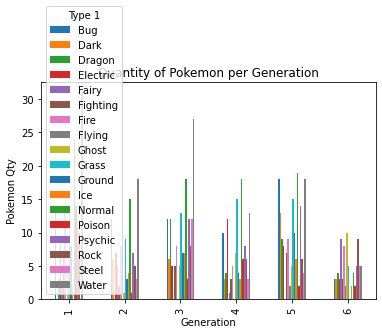

In [103]:
#Memanggil Grafik Batang
bar.plot.bar()
#Untuk sumbu X
plt.xlabel('Generation')
#Untuk sumbu Y
plt.ylabel('Pokemon Qty')
#Judul Grafik Batang
plt.title('Quantity of Pokemon per Generation')

In [104]:
#MENUNJUKKAN GENERATION PER TYPE POKEMON
bar = pk.pivot_table(values ='ID', columns='Type 2', index='Generation' , aggfunc='count')
bar

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Generation,,,,,,,,,,,,,,,,,,
1,3.0,1.0,3.0,6.0,5.0,9.0,10.0,23.0,NaN,3.0,12.0,3.0,13.0,32.0,16.0,2.0,2.0,23.0
2,1.0,3.0,2.0,8.0,7.0,4.0,9.0,19.0,1.0,7.0,10.0,1.0,11.0,3.0,6.0,4.0,3.0,7.0
3,7.0,11.0,5.0,5.0,8.0,6.0,3.0,14.0,8.0,11.0,11.0,4.0,14.0,5.0,24.0,6.0,2.0,16.0
4,4.0,5.0,4.0,5.0,1.0,8.0,3.0,16.0,4.0,10.0,10.0,6.0,12.0,2.0,7.0,4.0,9.0,11.0
5,3.0,7.0,7.0,9.0,3.0,17.0,13.0,21.0,6.0,13.0,3.0,9.0,9.0,7.0,12.0,7.0,11.0,8.0
6,2.0,3.0,8.0,NaN,14.0,2.0,2.0,6.0,5.0,14.0,2.0,4.0,6.0,NaN,6.0,NaN,NaN,8.0


Text(0.5, 1.0, 'Quantity of Pokemon per Generation')

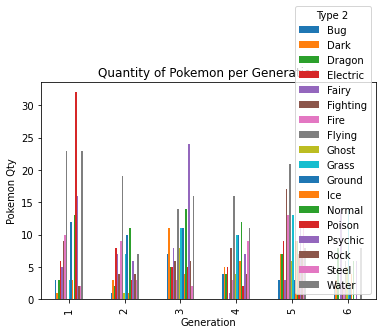

In [105]:
bar.plot.bar()
plt.xlabel('Generation')
plt.ylabel('Pokemon Qty')
plt.title('Quantity of Pokemon per Generation')

VI. KESIMPULAN

1. JUMLAH POKEMON YANG MEMILIKI 1 TIPE ADA 386 POKEMON
2. JUMLAH POKEMON GENERASI KE-1 YANG MEMILIKI 1 TIPE ADA 78 POKEMON
3. JUMLAH POKEMON GENERASI KE-6 YANG MEMILIKI 1 TIPE ADA 50 POKEMON
4. MASING-MASING POKEMON TIPE 1 DAN TIPE 2 BERDASARKAN LEGENDARY TERDAPAT PADA HASIL OUTPUT